## EDA for the airbnb dataset

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
plt.style.use('fivethirtyeight')
matplotlib.rcParams['font.family'] = "Arial"

from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly as py
import plotly.graph_objs as go
from plotly.subplots import make_subplots

init_notebook_mode(connected=True)

import collections
import itertools

import scipy.stats as stats
from scipy.stats import norm
from scipy.special import boxcox1p

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [2]:
#read the dataset
aemf_data = pd.read_csv('../data/Aemf1.csv')
aemf_data.head()

City       Price      Day     Room Type  Shared Room  Private Room  \
0  Amsterdam  194.033698  Weekday  Private room        False          True   
1  Amsterdam  344.245776  Weekday  Private room        False          True   
2  Amsterdam  264.101422  Weekday  Private room        False          True   
3  Amsterdam  433.529398  Weekday  Private room        False          True   
4  Amsterdam  485.552926  Weekday  Private room        False          True   

   Person Capacity  Superhost  Multiple Rooms  Business  Cleanliness Rating  \
0              2.0      False               1         0                10.0   
1              4.0      False               0         0                 8.0   
2              2.0      False               0         1                 9.0   
3              4.0      False               0         1                 9.0   
4              2.0       True               0         0                10.0   

   Guest Satisfaction  Bedrooms  City Center (km)  Metro Distance (km)  \
0                93.0         1          5.022964             2.539380   
1                85.0         1          0.488389             0.239404   
2                87.0         1          5.748312             3.651621   
3                90.0         2          0.384862             0.439876   
4                98.0         1          0.544738             0.318693   

   Attraction Index  Normalised Attraction Index  Restraunt Index  \
0         78.690379                     4.166708        98.253896   
1        631.176378                    33.421209       837.280757   
2         75.275877                     3.985908        95.386955   
3        493.272534                    26.119108       875.033098   
4        552.830324                    29.272733       815.305740   

   Normalised Restraunt Index  
0                    6.846473  
1                   58.342928  
2                    6.646700  
3                   60.973565  
4                   56.811677

In [3]:
# look at the type of dataframe
aemf_data.dtypes

City                            object
Price                          float64
Day                             object
Room Type                       object
Shared Room                       bool
Private Room                      bool
Person Capacity                float64
Superhost                         bool
Multiple Rooms                   int64
Business                         int64
Cleanliness Rating             float64
Guest Satisfaction             float64
Bedrooms                         int64
City Center (km)               float64
Metro Distance (km)            float64
Attraction Index               float64
Normalised Attraction Index    float64
Restraunt Index                float64
Normalised Restraunt Index     float64
dtype: object

In [31]:
# look at the description of data
aemf_data.describe()

Price  Person Capacity  Multiple Rooms      Business  \
count  41714.000000     41714.000000    41714.000000  41714.000000   
mean     260.094423         3.237235        0.295273      0.341180   
std      279.408493         1.299459        0.456171      0.474112   
min       34.779339         2.000000        0.000000      0.000000   
25%      144.016085         2.000000        0.000000      0.000000   
50%      203.819274         3.000000        0.000000      0.000000   
75%      297.373358         4.000000        1.000000      1.000000   
max    18545.450285         6.000000        1.000000      1.000000   

       Cleanliness Rating  Guest Satisfaction      Bedrooms  City Center (km)  \
count        41714.000000        41714.000000  41714.000000      41714.000000   
mean             9.442274           93.103179      1.165939          2.679792   
std              0.889173            8.141745      0.638157          1.996684   
min              2.000000           20.000000      0.000000          0.015045   
25%              9.000000           90.000000      1.000000          1.275913   
50%             10.000000           95.000000      1.000000          2.253237   
75%             10.000000           98.000000      1.000000          3.584489   
max             10.000000          100.000000     10.000000         25.284557   

       Metro Distance (km)  Attraction Index  Normalised Attraction Index  \
count         41714.000000      41714.000000                 41714.000000   
mean              0.603921        293.905990                    11.719658   
std               0.706206        235.750055                     8.379161   
min               0.002301         15.152201                     0.926301   
25%               0.236693        124.371614                     5.510735   
50%               0.391220        228.920599                     9.951086   
75%               0.678702        394.000201                    15.467009   
max              14.273577       4513.563486                   100.000000   

       Restraunt Index  Normalised Restraunt Index  
count     41714.000000                41714.000000  
mean        626.692618                   25.553590  
std         520.644720                   18.484572  
min          19.576924                    0.592757  
25%         210.459574                   11.132052  
50%         519.583509                   21.814414  
75%         860.708156                   36.821356  
max        6696.156772                  100.000000

### Price Distribution

<AxesSubplot: >

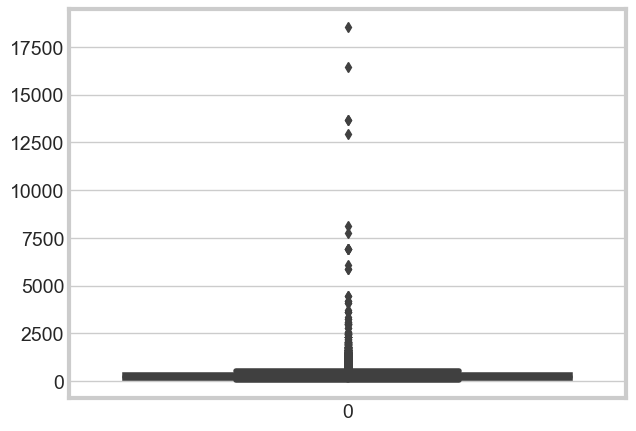

In [32]:
##changing the bool to int
aemf_data['Shared Room'] = aemf_data['Shared Room'].astype(int)
aemf_data['Private Room'] = aemf_data['Private Room'].astype(int)
aemf_data['Superhost'] = aemf_data['Superhost'].astype(int)
##viewing the outliers of price
sns.boxplot(aemf_data['Price'])

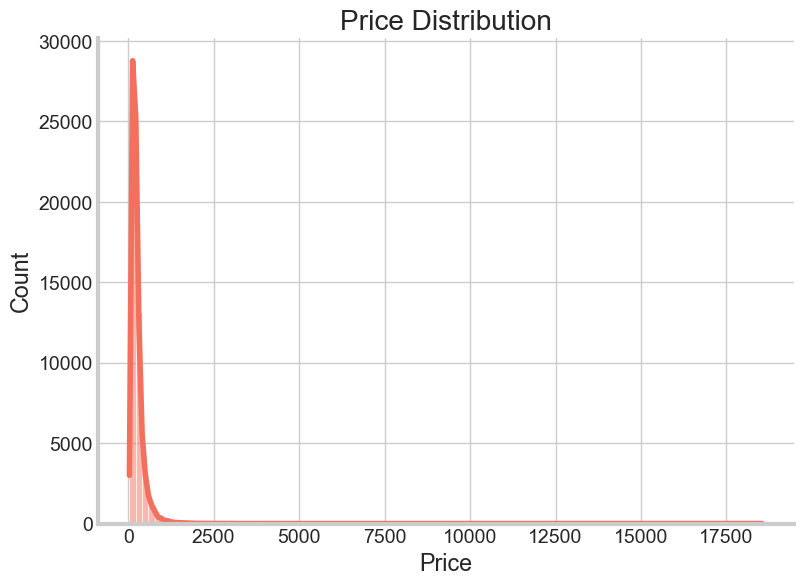

In [36]:
# firstly, I use the total data to make a histogram
plt.figure(figsize = (8, 6))
sns.set_style('whitegrid')
sns.histplot(data = aemf_data, x = 'Price', bins = 100, multiple = 'stack', kde = True, color='#F4705E')
# set the plot detail 
plt.title('Price Distribution')
plt.xlabel('Price')
plt.ylabel('Count')
sns.despine()

In [37]:
# base on the distribution above, we can see that there are outliers in the data
# so next I use IQR method to remove the outlier and see the detail of price distribution
col_outlier = ['Price', 'City Center (km)', 'Metro Distance (km)', 
               'Attraction Index', 'Normalised Attraction Index', 
               'Restraunt Index', 'Normalised Restraunt Index'] 
# IQR method
for col in col_outlier:
    Q1 = aemf_data[col].quantile(0.25)
    Q3 = aemf_data[col].quantile(0.75)

    IQR = Q3 - Q1

    limit_low = Q1 - IQR * 1.7
    limit_high = Q3 + IQR * 1.7
    # remove the outlier
    aemf_data = aemf_data[(aemf_data[col] >= limit_low) & (aemf_data[col] <= limit_high)]

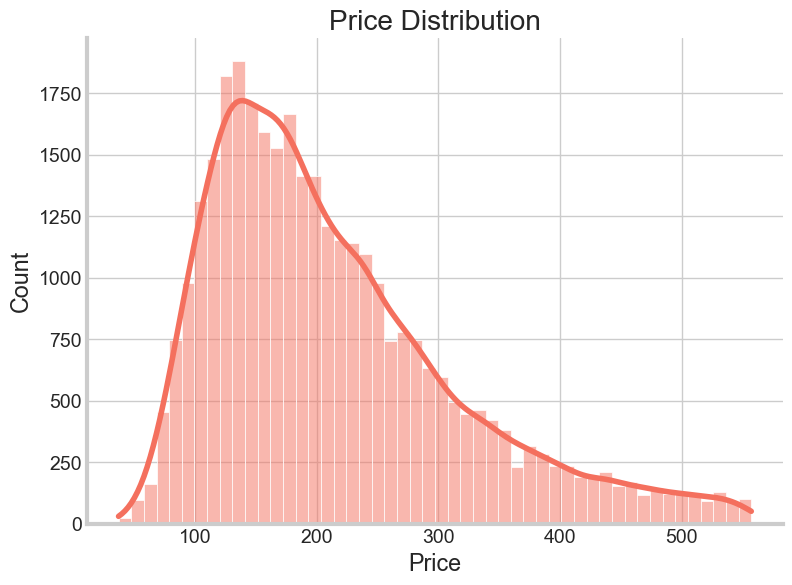

In [38]:
# plot the price distribution without outlier
plt.figure(figsize = (8, 6))
sns.set_style('whitegrid')
sns.histplot(data = aemf_data, x = 'Price', bins = 50, multiple = 'stack', kde = True, color='#F4705E')
# set the detail of plot
plt.title('Price Distribution')
plt.xlabel('Price')
plt.ylabel('Count')
sns.despine()

### Correlation matrix

Text(0.5, 1.0, 'The heatmap of correlated columns')

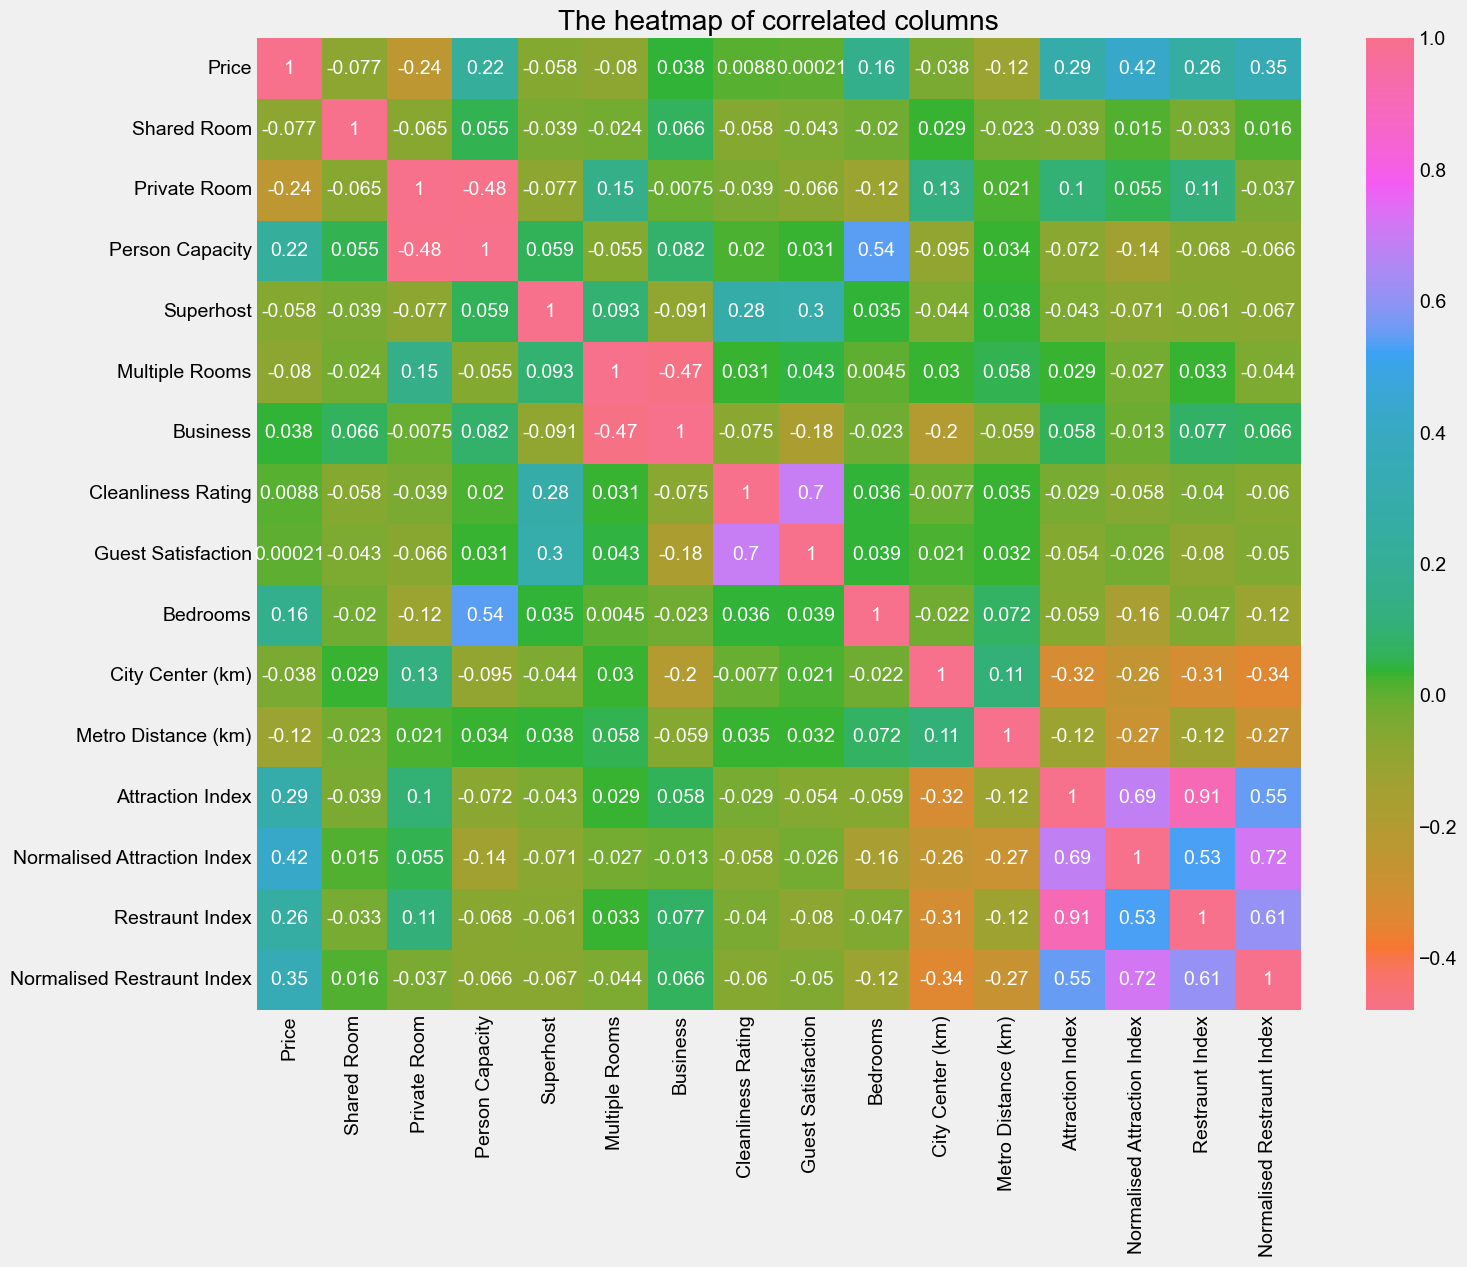

In [22]:
# Define a custom colormap
cmap = sns.color_palette("", as_cmap=True)
# plot the heatmap of corelated columns
plt.figure(figsize = (15, 12))
sns.heatmap(aemf_data.corr(), annot = True,cmap=cmap)
plt.title("The heatmap of correlated columns")

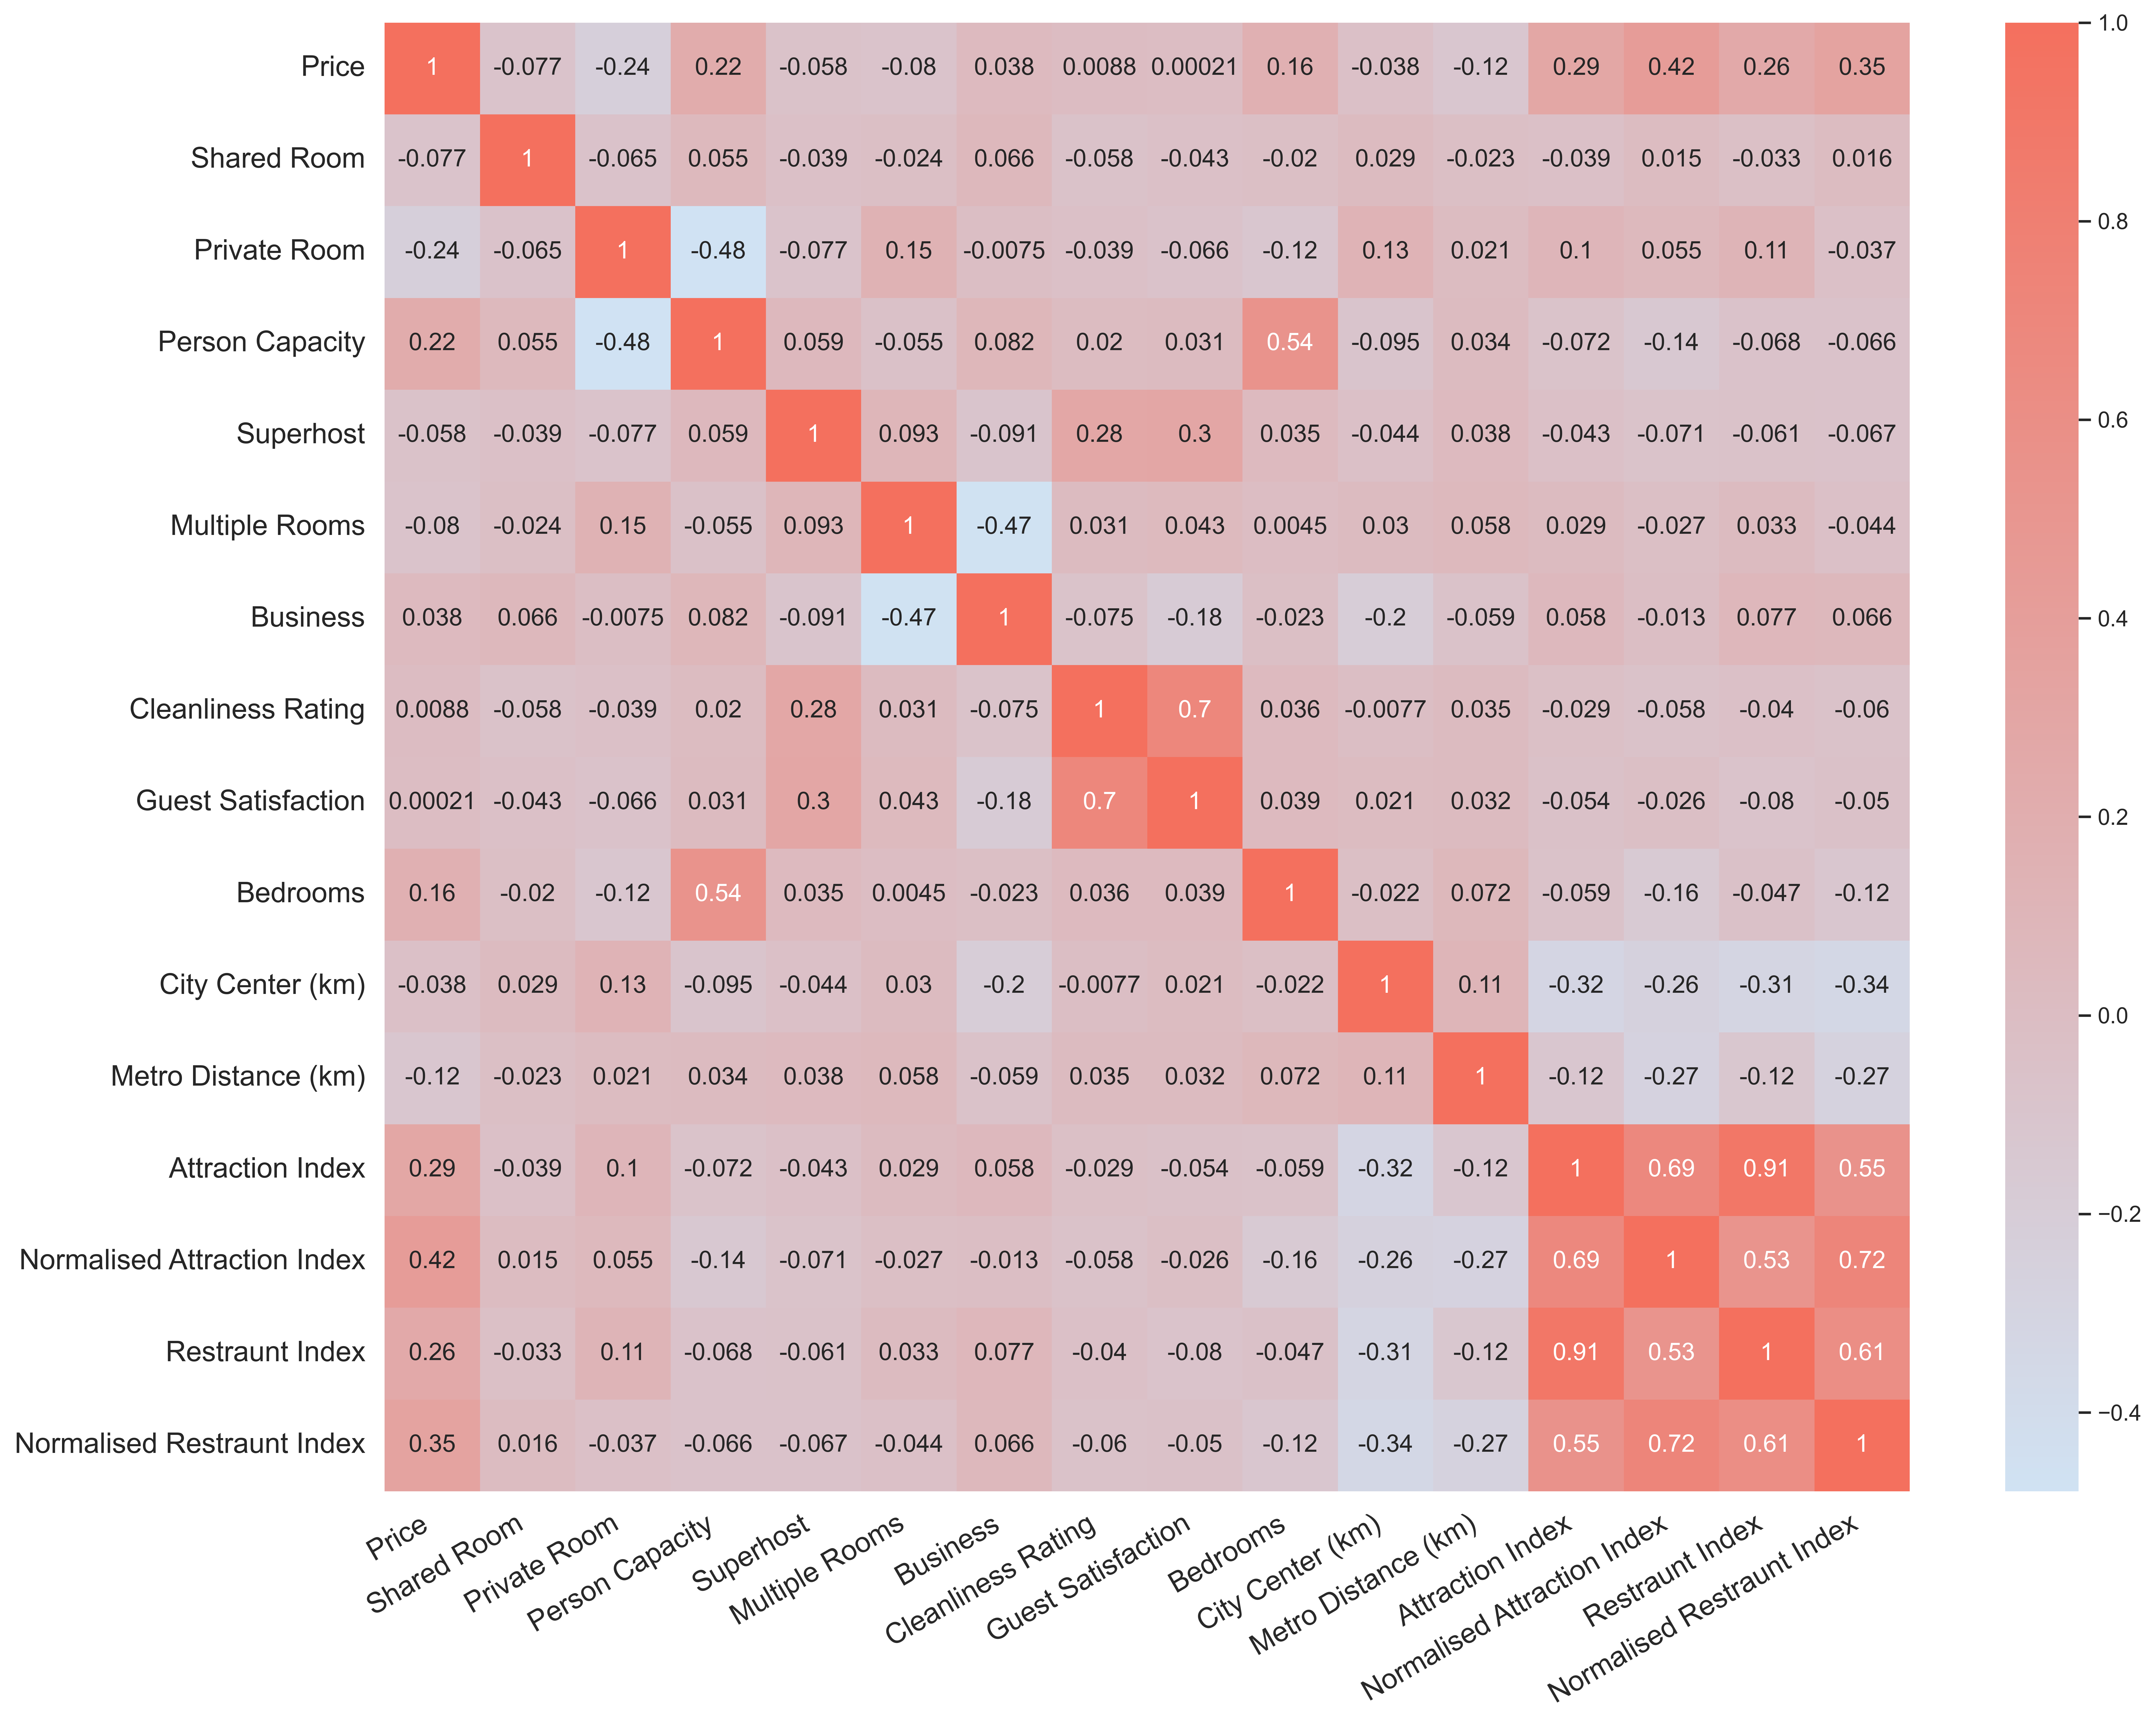

In [160]:
import matplotlib.colors as mcolors
# make the correlated matrix more beautiful
sns.set_style('white')
# Define a custom colormap with a gradient from #D0E2F3 to #F4705E
colors = ['#D0E2F3', '#F4705E']
cmap = mcolors.LinearSegmentedColormap.from_list('custom', colors)

plt.figure(figsize = (16, 12),dpi=500)
ax=sns.heatmap(aemf_data.corr(), annot = True,cmap=cmap)
ax.set_xticklabels(ax.get_xticklabels(), ha="right", rotation=30,x=10,fontsize=14)
ax.set_yticklabels(ax.get_yticklabels(),fontsize=14)
plt.tight_layout()
plt.show()

## Plot XGBboost Feature Importance

In [98]:
import seaborn as sns
import matplotlib.pyplot as plt
# The feature importance coefficient was copy from the model file
# feature importance 1 was from XGBoost model
feature_importance_1 = pd.DataFrame({'feature': ['Person Capacity',
 'Multiple Rooms','Business','Cleanliness Rating', 'Guest Satisfaction',
 'Bedrooms','City Center','Metro Distance', 'Attraction Index', 'Restraunt Index',
 'Shared Room', 'Private Room', 'Superhost', 'Day_Weekday', 'Entire home/apt'], 
 'importance': [3733.0, 1612.0, 1723.0, 2244.0, 8809.0, 1793.0,
 22235.0, 21389.0, 20079.0, 17527.0, 135.0, 1092.0, 1411.0, 1252.0, 329.0]})

# feature importance 2 was from random forest model
feature_importance_2 = pd.DataFrame({'feature': ['Person Capacity', 'Multiple Rooms', 'Business', 'Cleanliness Rating',
       'Guest Satisfaction', 'Bedrooms', 'City Center','Metro Distance', 'Attraction Index',
       'Restraunt Index', 'Shared Room', 'Private Room','Superhost', 
       'Day_Weekday', 'Day_Weekend', 'Entire home/apt'], 
       'importance': [0.05871136, 0.00550167, 0.00885023, 0.00961264, 0.02278521,
       0.11053775, 0.08091592, 0.05370142, 0.33542224, 0.18392684,
       0.00427872, 0.02528657, 0.00707282, 0.00349518, 0.00346153,
       0.04991846]})

# Create figure with two subplots
# sort the feature importance 1
feature_importance_1_sorted = feature_importance_1.sort_values(by='importance', ascending=False)

# merge the data
merge_data=pd.merge(feature_importance_2,feature_importance_1_sorted,on='feature',how='outer')
merge_data=merge_data.sort_values(by="importance_y",ascending=False)

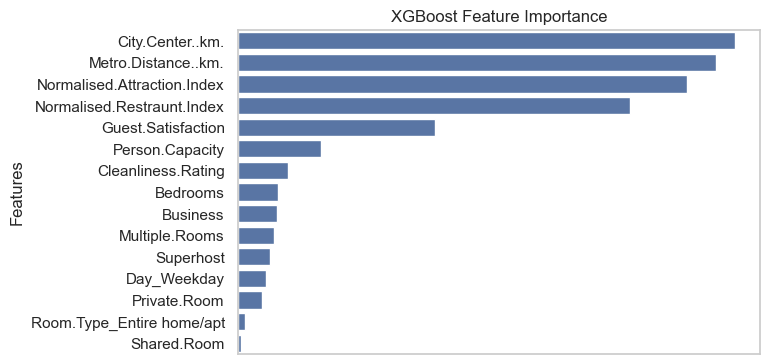

In [60]:
# Create the plot
sns.set(style="whitegrid")
fig, ax = plt.subplots(figsize=(6, 4))

sns.barplot(x='importance', y='feature', data=feature_importance_1_sorted, color='b')
ax.set_title('XGBoost Feature Importance')
plt.xlabel('')
plt.ylabel('Features')
plt.xticks([])

plt.show()

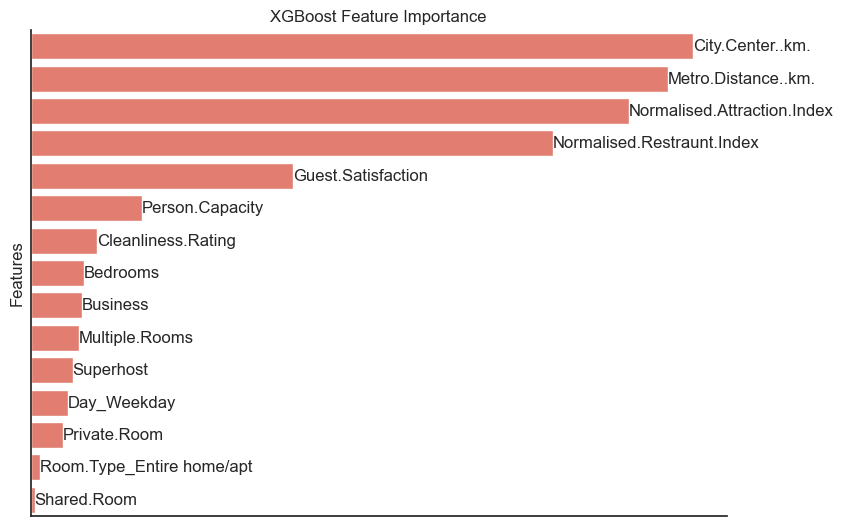

In [86]:
# Create a horizontal bar plot of the feature importance data
sns.set_style('white')
plt.figure(figsize=(8,6))
sns.barplot(x='importance', y='feature', data=feature_importance_1_sorted, color='#F4705E')

# Add feature name labels at the end of each bar
for i, (feature, importance) in enumerate(zip(feature_importance_1_sorted['feature'], feature_importance_1_sorted['importance'])):
    plt.text(importance + 0.02, i, feature, ha='left', va='center')

# Remove the x-axis label
plt.xlabel('')
plt.ylabel('Features')
plt.xticks([])
plt.yticks([])
# Set the title
plt.title('XGBoost Feature Importance')
sns.despine()
# Show the plot
plt.show()

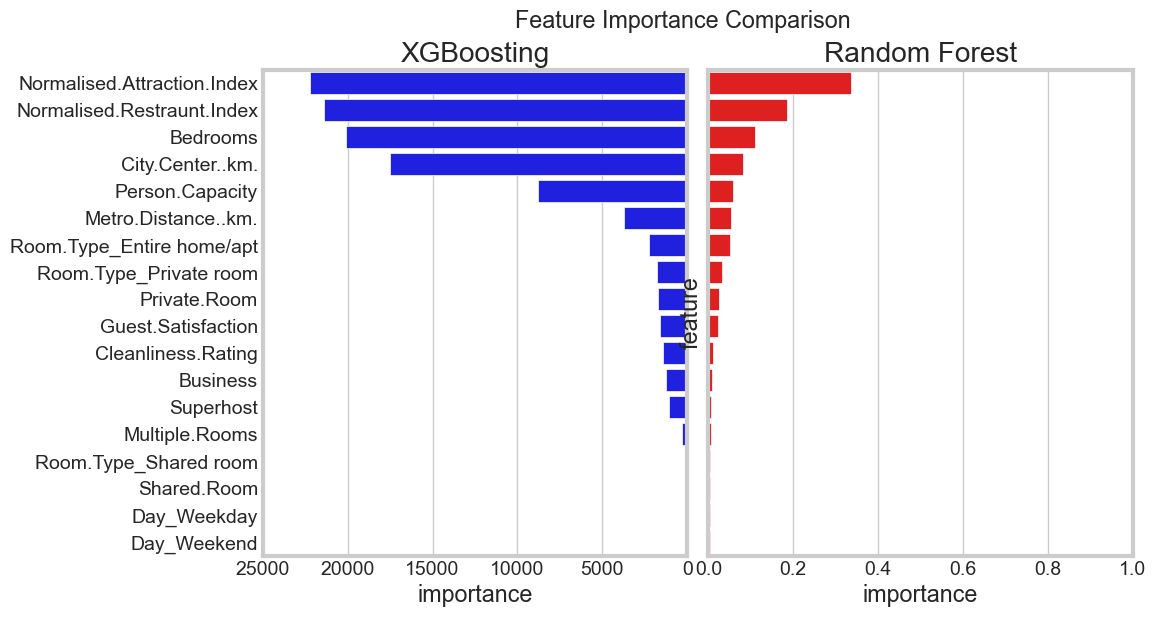

In [57]:
# Create figure with two subplots
fig, axs = plt.subplots(ncols=2, figsize=(10, 6), sharey=True)

# Sort the first feature importance by importance value
feature_importance_1_sorted = feature_importance_1.sort_values(by='importance', ascending=False)

# Plot the first feature importance
sns.barplot(x='importance', y='feature', data=feature_importance_1_sorted, ax=axs[0], color='b')
axs[0].set_title('XGBoosting')

# Sort the second feature importance by importance value
feature_importance_2_sorted = feature_importance_2.sort_values(by='importance', ascending=False)

# Plot the second feature importance
sns.barplot(x='importance', y='feature', data=feature_importance_2_sorted, ax=axs[1], color='r')
axs[1].set_title('Random Forest')

# Set the y-label for the left subplot
axs[0].set_ylabel('')

# Set the x-axis limit to be the same for both subplots
axs[0].set_xlim([0, 25000])
axs[1].set_xlim([0, 1])

# Flip the second subplot horizontally
axs[0].invert_xaxis()

# Remove the y-axis tick marks from the second subplot
axs[1].tick_params(axis='y', which='both', length=0)

# Set the x-axis labels for both subplots based on sorted feature importance
#axs[0].set_xticklabels(feature_importance_1_sorted['importance'])
#axs[1].set_xticklabels(feature_importance_2_sorted['importance'])

# Set the title and adjust the spacing between subplots
fig.suptitle('Feature Importance Comparison')
fig.subplots_adjust(wspace=0.05)


plt.show()


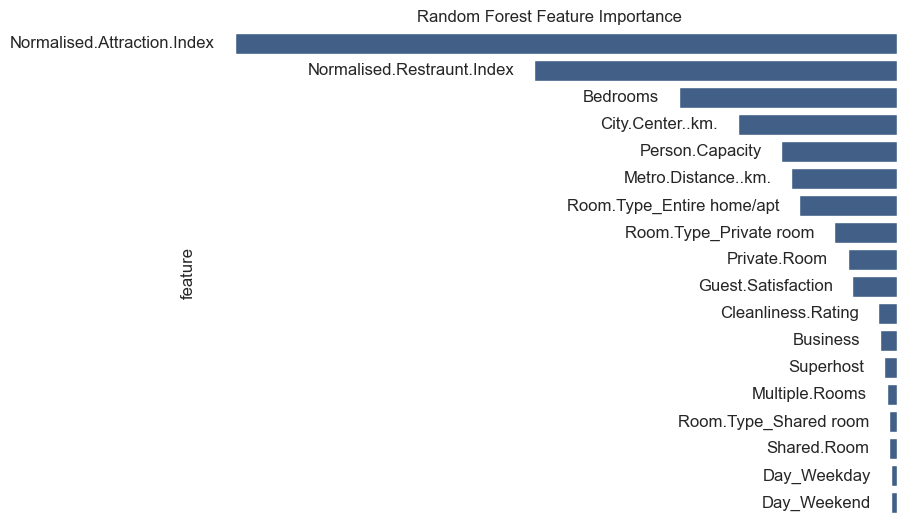

In [84]:
# Create a horizontal bar plot of the feature importance data
sns.set_style('white')
plt.figure(figsize=(8,6))
sns.barplot(x='importance', y='feature', data=feature_importance_2_sorted, color='#375F92')

# Add feature name labels at the end of each bar
for i, (feature, importance) in enumerate(zip(feature_importance_2_sorted['feature'], feature_importance_2_sorted['importance'])):
    plt.text(importance + 0.01, i, feature, ha='right', va='center')

# Remove the x-axis label
plt.xlabel('')
#plt.ylabel('Features')
plt.xticks([])
plt.yticks([])
# Set the title
plt.title('Random Forest Feature Importance')
plt.gca().invert_xaxis()

sns.despine(bottom=True, left=True)
# Show the plot
plt.show()

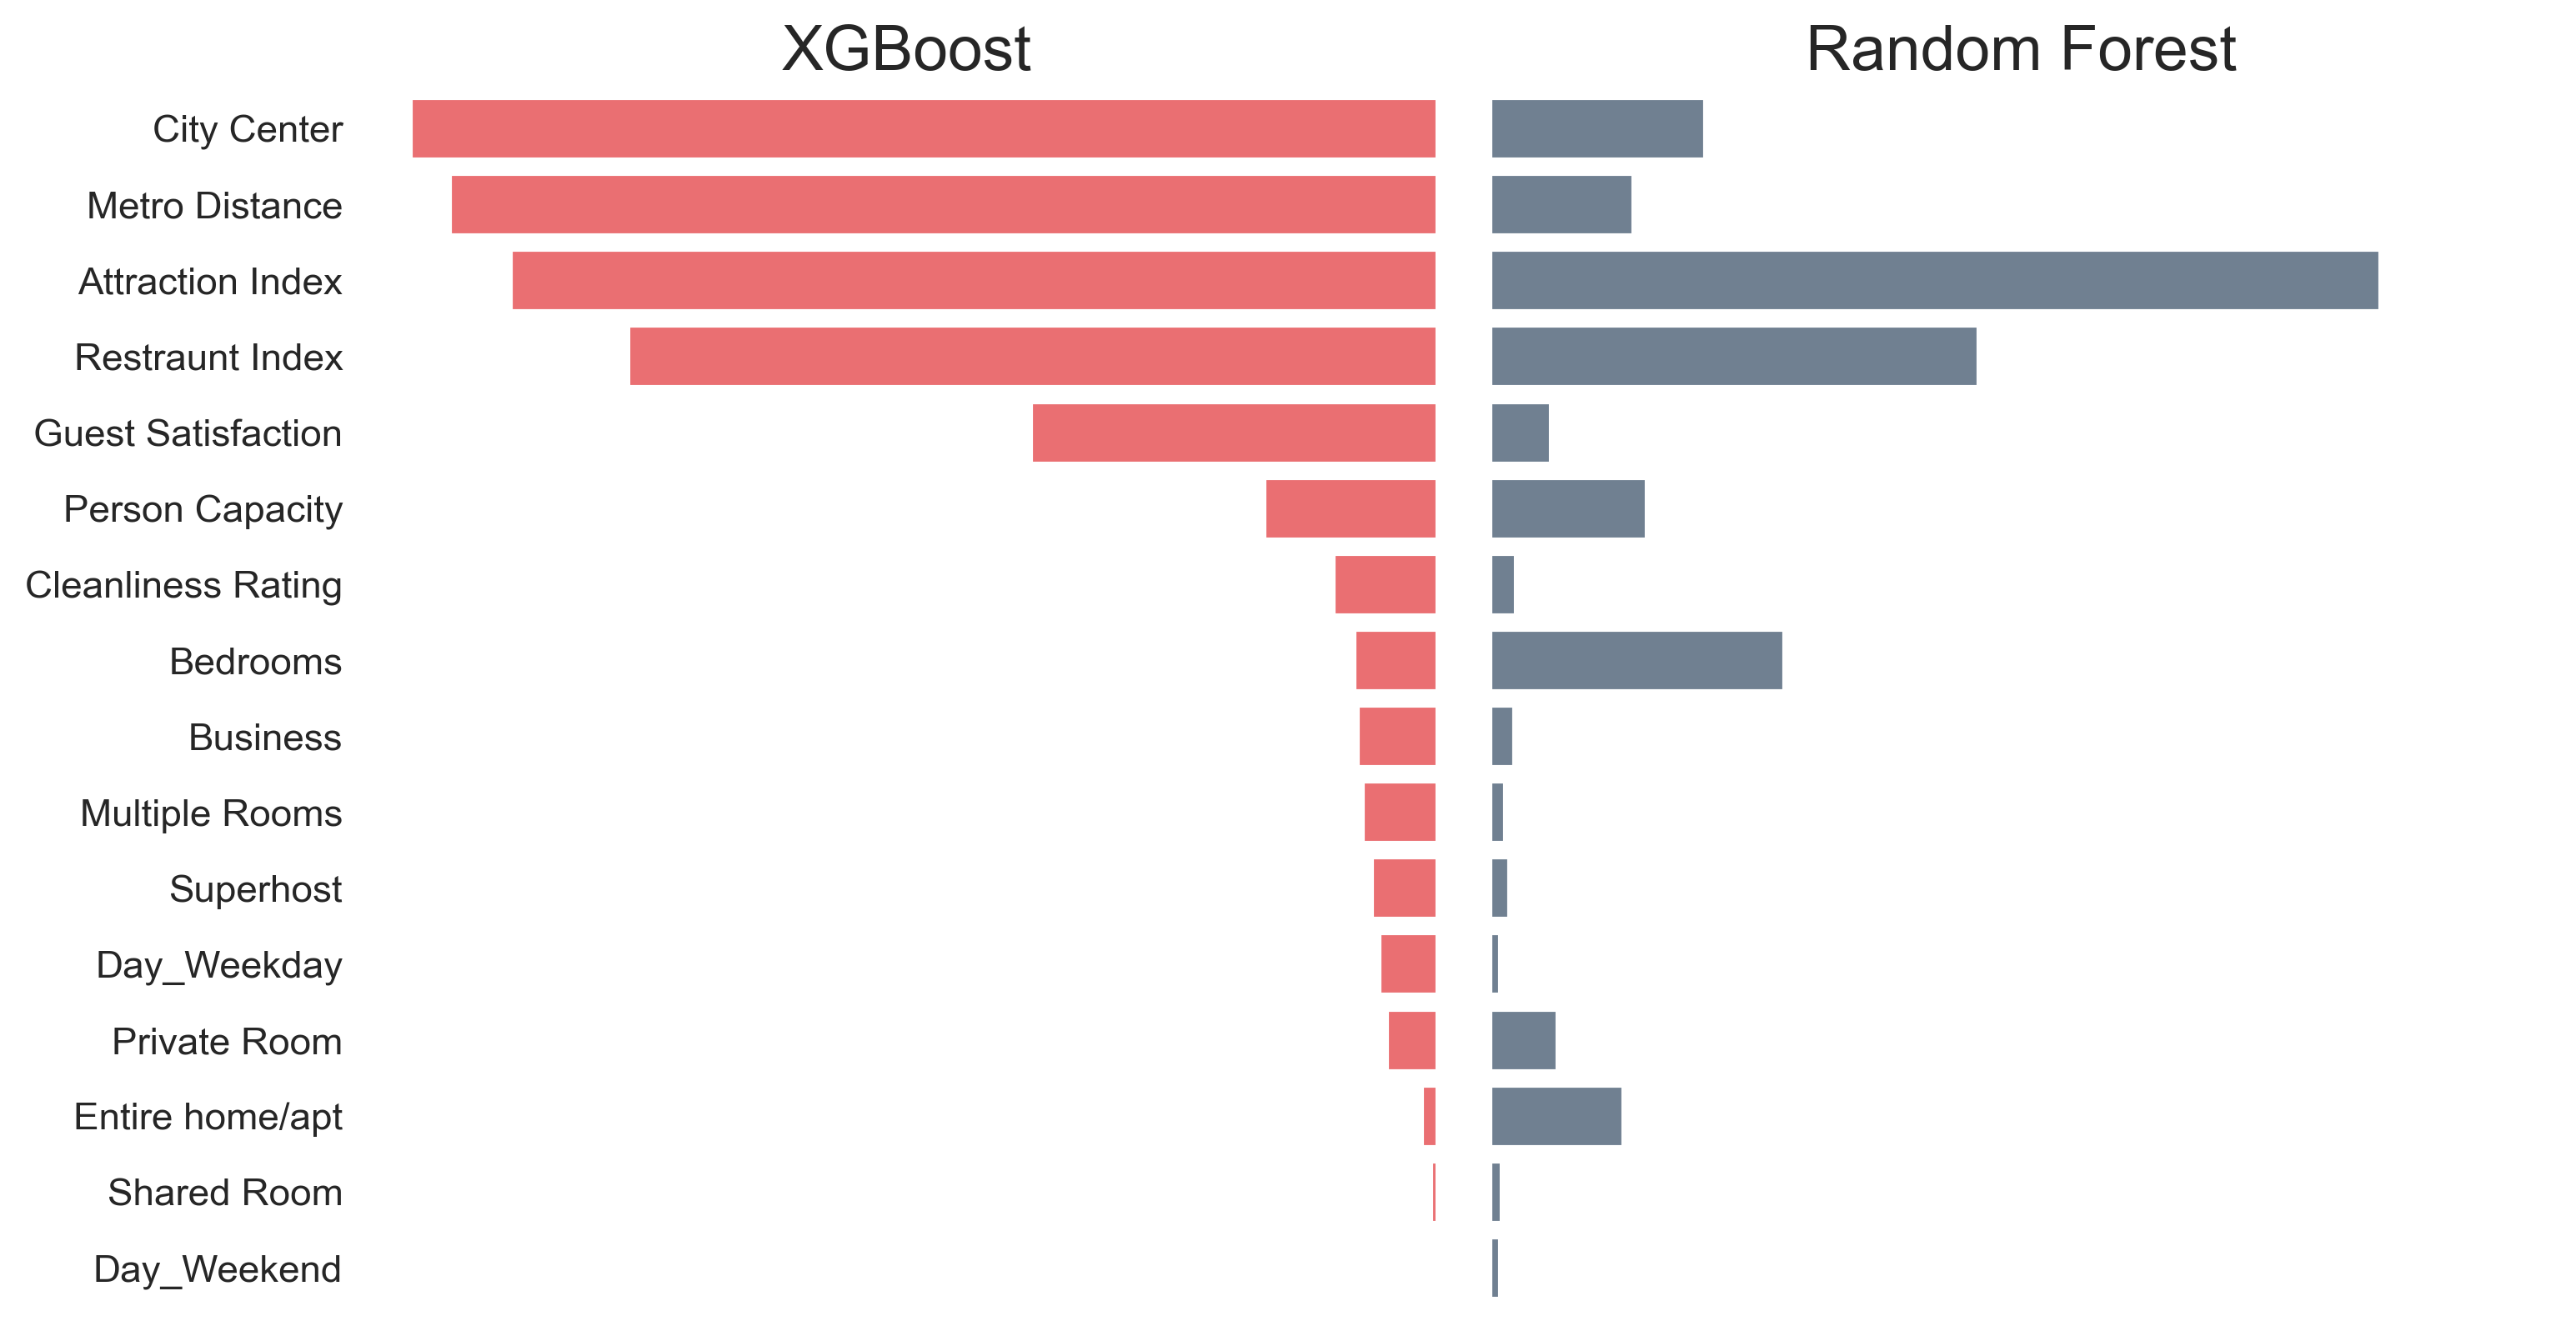

In [151]:

# Create figure with two subplots
fig, axs = plt.subplots(ncols=2, figsize=(10, 6), sharey=True,dpi=300)

# Plot the first feature importance
sns.barplot(x='importance_y', y='feature', data=merge_data, ax=axs[0], color='#fe5b5f')
axs[0].set_title('XGBoost',fontsize=18)

# Plot the second feature importance
sns.barplot(x='importance_x', y='feature', data=merge_data, ax=axs[1], color='#6a8097')
axs[1].set_title('Random Forest',fontsize=18)

# Set the y-label for the left subplot
axs[0].set_ylabel('',fontsize=16)
axs[1].set_ylabel('',fontsize=16)
# Set the x-axis limit to be the same for both subplots
axs[0].set_xlim([0, 23000])
axs[1].set_xlim([0, 0.4])

# Flip the second subplot horizontally
axs[0].invert_xaxis()

# Remove the y-axis tick marks from the second subplot
axs[1].tick_params(axis='y', which='both', length=0)

#axs[0].set_x_axis_off()
#axs[1].set_x_axis_off()
axs[0].set_xticks([])
axs[1].set_xticks([])
axs[0].set_xlabel("",fontsize=16)
axs[1].set_xlabel("",fontsize=16)

# Set the title and adjust the spacing between subplots
#fig.suptitle('Feature Importance Comparison')
fig.subplots_adjust(wspace=0.05)
sns.despine(top=True,right=True,left=True,bottom=True)
plt.show()
